In [1]:
%matplotlib inline
import numpy as np
from astropy.table import Table
import matplotlib.pyplot as plt
from toolbox.astro import angsep

In [2]:
cat = Table.read('../data/mycats/hsc_yang_Ngal_min_4.fits')
print len(cat), 'objects in catalog'
print np.unique(cat['group_id']).size, 'galaxy groups'
print len(cat[cat['bright']==1]), 'bcgs in catalog \n'
print '*** column names ***'
for col in cat.colnames:
    print col

399 objects in catalog
55 galaxy groups
55 bcgs in catalog 

*** column names ***
id
parent
tract
patch
ra
dec
group_id
bright
match_sep
z
Ngal
Mh_Lest
Mh_Mest
g-r
Mr


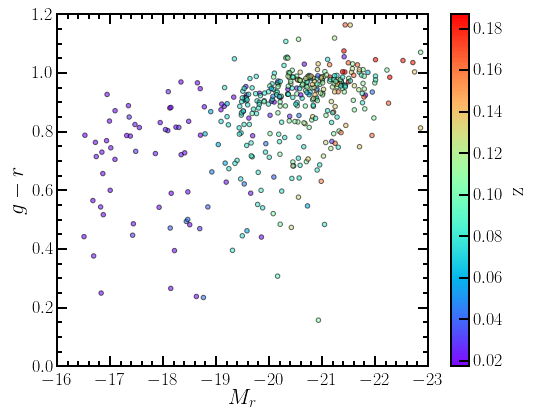

In [3]:
f1, a1 = plt.subplots(figsize=(8,6))
cmap = plt.cm.rainbow
sc = a1.scatter(cat['Mr'], cat['g-r'], c=cat['z'], marker='o', alpha=0.6, cmap=cmap, rasterized=True)
cbar = f1.colorbar(sc)
cbar.set_label('z')
cbar.solids.set_edgecolor("face")
a1.set_xlabel('$M_r$')
a1.set_ylabel('$g-r$')
a1.set_ylim(ymax=1.2)
a1.set_xlim(xmin=-23)
a1.minorticks_on()
a1.invert_xaxis()

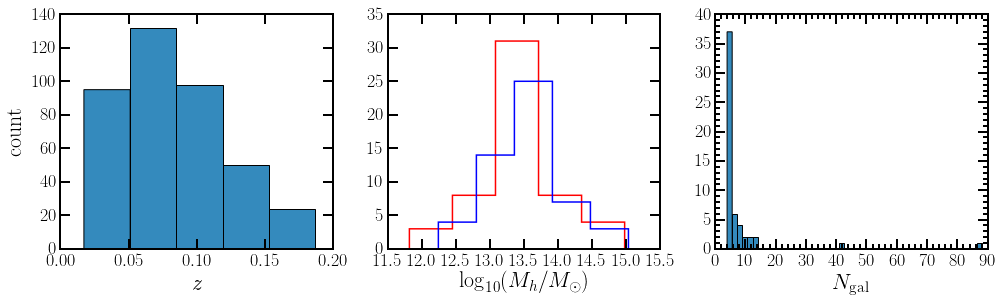

In [4]:
gal_num_1 = cat.group_by('group_id')[cat.group_by('group_id').groups.indices[:-1]]
Mh_Lest = gal_num_1['Mh_Lest']
Mh_Mest = gal_num_1['Mh_Mest']
Ngal = gal_num_1['Ngal']

f2, a2 = plt.subplots(1,3,figsize=(16,4))
a2[0].hist(cat['z'],bins=5)
a2[0].set_xlabel('$z$')
a2[0].set_ylabel('count')
a2[1].hist(Mh_Lest[Mh_Lest>5], color='r', bins=5, histtype='step', lw=1.5)
a2[1].hist(Mh_Mest[Mh_Mest>5], color='b', bins=5, histtype='step', lw=1.5)
a2[1].set_xlabel('$\log_{10}(M_h/M_\odot)$')
a2[2].hist(Ngal, bins=50)
a2[2].set_xlabel('$N_\mathrm{gal}$')
a2[2].minorticks_on();